In [2]:
import os
if 'maawg' not in os.getcwd():
    os.chdir("../maawg/m3_sf_2020_training")

In [3]:
from dataclasses import *
from IPython.display import Image, display, Video
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import time

In [4]:
import matplotlib.style as style
style.use('fivethirtyeight')
FIGSIZE = (13,8)

In [5]:
# Generate some random points
np.random.seed(23580918)
x = np.random.rand(100, 1) * 10
noise = (np.random.randn(100, 1) + 0.7) * 0.5
y = 0.8 + 0.3 * x + noise

In [6]:
def gen_random_line():   
    y_intercept_range = (0.3, 3)
    slope_range = (-0.1, 0.6)
    
    y_intercept = random.uniform(*y_intercept_range)
    slope = random.uniform(*slope_range)
    
    if slope <= -0.05 and y_intercept <0.1:
        # regenerate
        y_intercept, slope = gen_random_line()
            
    return y_intercept, slope


def compare_approx(x, y, threshold):
    if abs(x - y) < threshold:
        return True
    else:
        return False
    
def gen(chosen_vars):
    if chosen_vars is None:
        return gen_random_line()
    else:
        testvals = gen_random_line()
        for i in chosen_vars:
            if compare_approx(i.y_intercept, testvals[0], 0.3):
                if compare_approx(i.slope, testvals[1], 0.6):
                    # regenerate
                    return gen(chosen_vars)
        return testvals

In [7]:
@dataclass
class Line:
    color: str
    y_intercept: float
    slope: float
    cost: float = None

In [8]:
colors = ['b','g','r','c','m','y','k']
colormap = {'b':'blue',
            'g':'green',
            'r':'red',
            'c':'cyan',
            'm':'magenta',
            'y':'yellow',
            'k':'black'
           }
inverse_colormap = {}
for i in colormap:
    inverse_colormap[colormap[i]] = i

In [9]:
def plot_points(red=False, random_lines=None, lines=None, savefile=None):
    
    _colors = random.sample(colors, len(colors))
    
    #compare_threshold = 0
    
    plt.figure(figsize=FIGSIZE)
    plt.scatter(x,y,s=55)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis((-0.03, 10.1, -0.03, 6)) #xmin, xmax, ymin, ymax
    
    if lines is not None:
        for i in lines:
            if i.color in inverse_colormap:
                color = inverse_colormap[i.color]
            else:
                color = i.color
            plt.plot(x, i.y_intercept + i.slope * x, color)

    chosen_vars = []
    if random_lines is not None:
        if random_lines > 7:
            random_lines = 7
            
        for i in range(random_lines):
            rl = gen(chosen_vars)
            randcolor = colors[i]
            chosen_vars.append(Line(colormap[randcolor], rl[0], rl[1]))
            plt.plot(x, rl[0] + rl[1] * x, randcolor)
    
    if red:
        plt.plot(x, 1.2 + 0.3 * x, "r")

    if savefile:
        plt.savefig(savefile)
        plt.close()
    else:
        plt.show()
    if chosen_vars:
        return chosen_vars

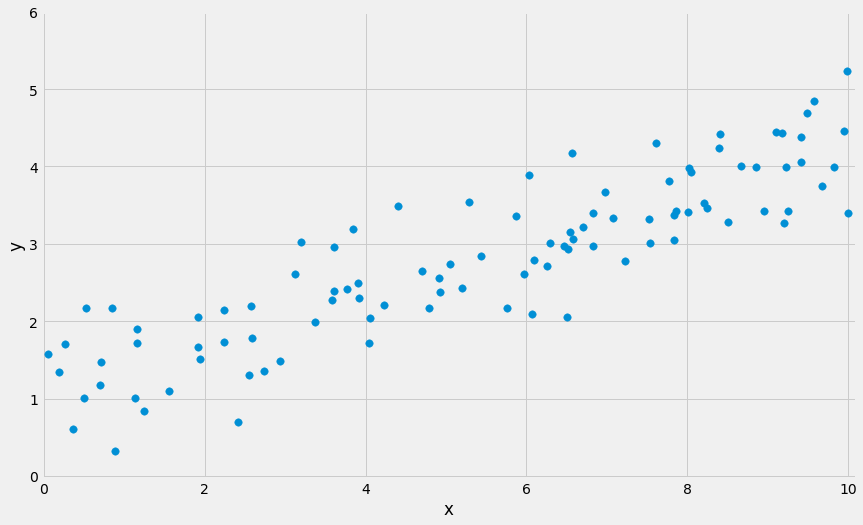

In [12]:
plot_points(0)

But software can't "see" the general shape in the same way we can. To them, it's more like this:

In [13]:
for i in range(50):
    print(x[i][0], y[i][0], sep="  \t")

9.824886792952027  	3.9892042920127397
7.614293563673678  	4.302287378934495
6.978674980129168  	3.6734544467487713
1.936041598735947  	1.5136530530756027
4.914338089223151  	2.552892131775596
9.989118582079097  	5.23969268387858
8.6679166394225  	4.007610919693362
6.099541474491854  	2.7973492968744202
6.833857182160652  	2.9666885433456596
3.6114497059205295  	2.3898412352428022
6.565332786261937  	4.178661461023332
9.422695762706736  	4.060874255654454
4.9208568809557995  	2.3775302833850733
9.201495353176144  	3.2743960971861537
6.5427038362258605  	3.1544958709079225
6.708138638571142  	3.220400281957546
7.543219731173149  	3.0049766128657773
8.053341337475771  	3.923364411638097
8.0107316584253  	3.4085177439656533
8.856036117658483  	3.9968195196556717
9.573759826009857  	4.844513513714544
9.949238135741451  	4.457982160271245
5.869402897262168  	3.3563134023279195
8.245636960680413  	3.4581734962694908
9.674058181171876  	3.7444270290941746
8.206366299502733  	3.523505819638344

Now, we could start generating lines at random and seeing how well they fit the data.

Which one looks best? Worst?

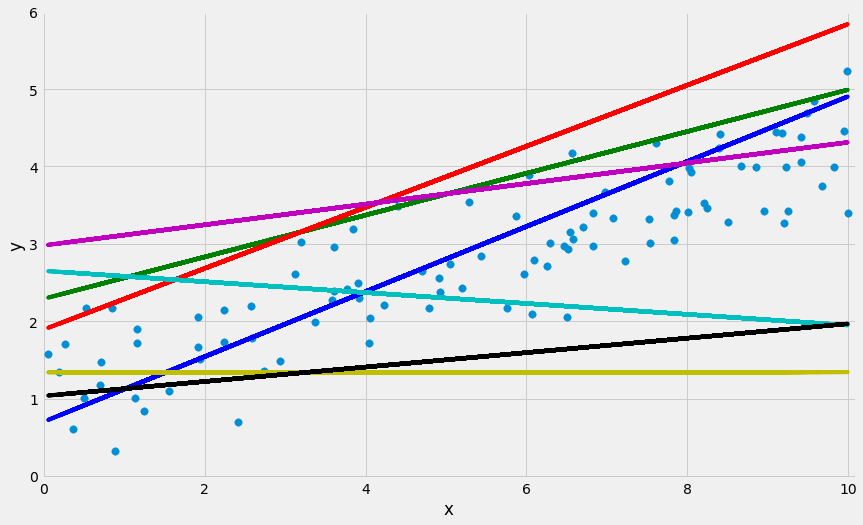

In [14]:
random_lines = plot_points(0, 8)

If we want to figure out which one is closest, we need to have a way to score each of these lines.

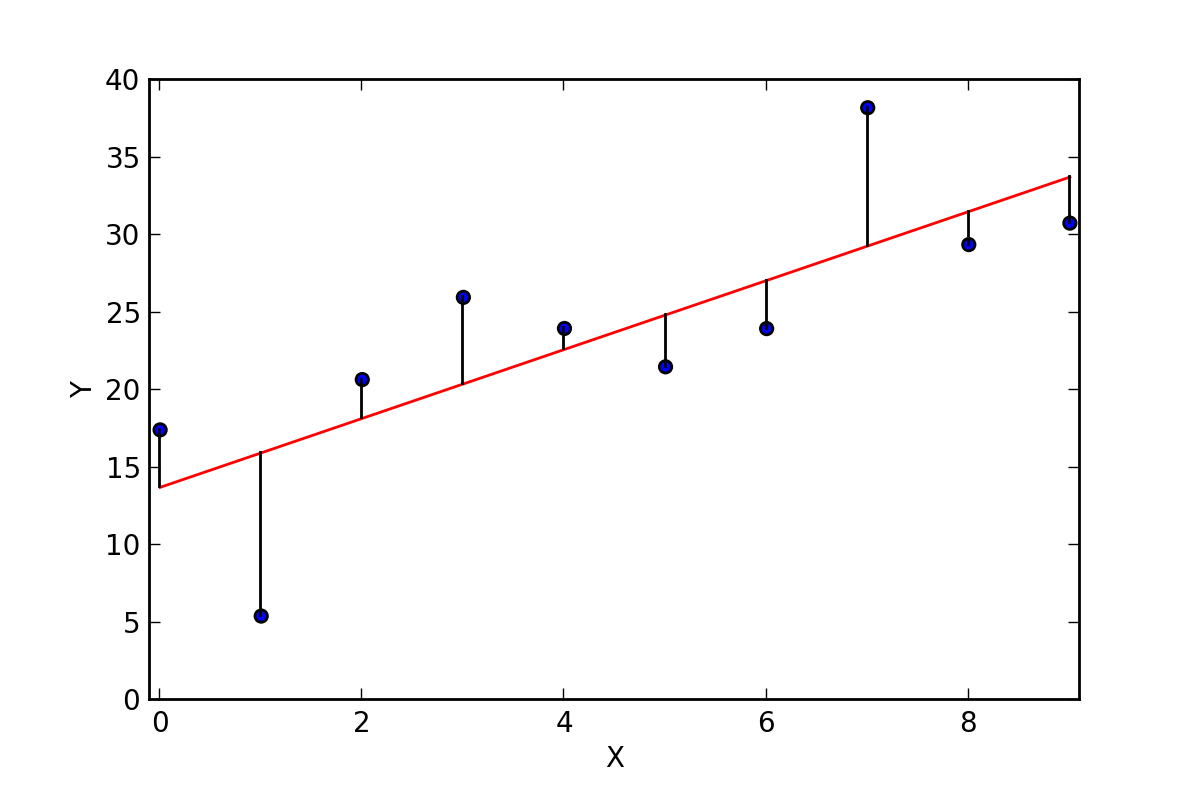

In [15]:
display(Image("img/fit_errors.png")) #, width=800))

In [16]:
def line_equation(yi, slope, x):
    return yi + slope * x

def score(line):
    y_predict = []
    for i in x:
        y_predict.append(line_equation(line.y_intercept, line.slope, i))
    residuals = y_predict - y

    cost = np.sum((residuals ** 2)) / (2 * x.shape[0])
    return cost

def score_lines(lines):
    for n, i in enumerate(lines):
        cost = score(i)
        lines[n].cost = cost
    scores = sorted(lines, key=lambda i: i.cost)
    
    return scores, pd.DataFrame([asdict(i) for i in scores])

In [55]:
line_scores, df = score_lines(random_lines)
df.index = df['color']

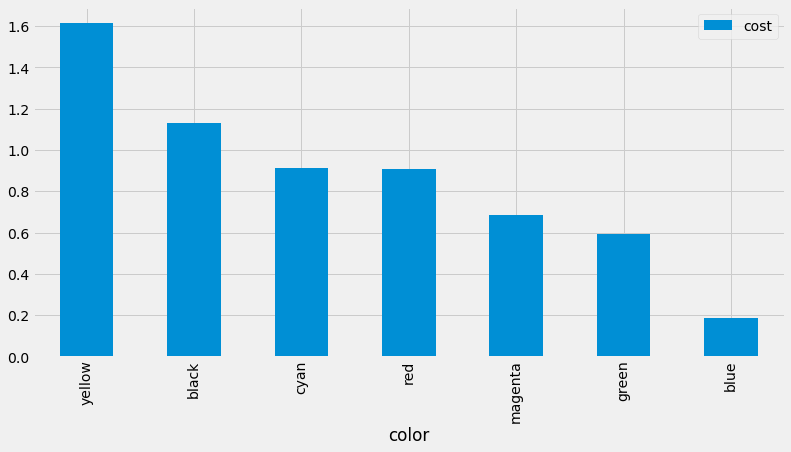

In [56]:
df[['color','cost']].sort_values('cost', ascending=False).plot(kind="bar", figsize=(12,6))

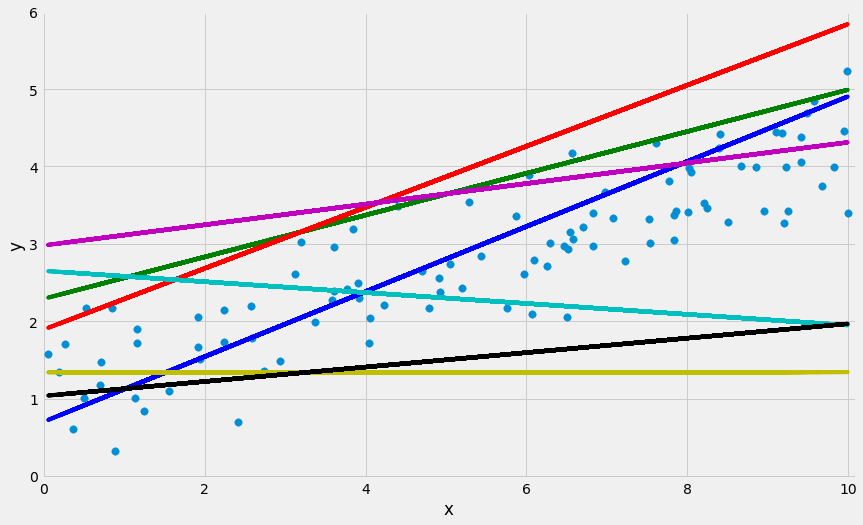

In [18]:
plot_points(lines=random_lines)

A brief digression...

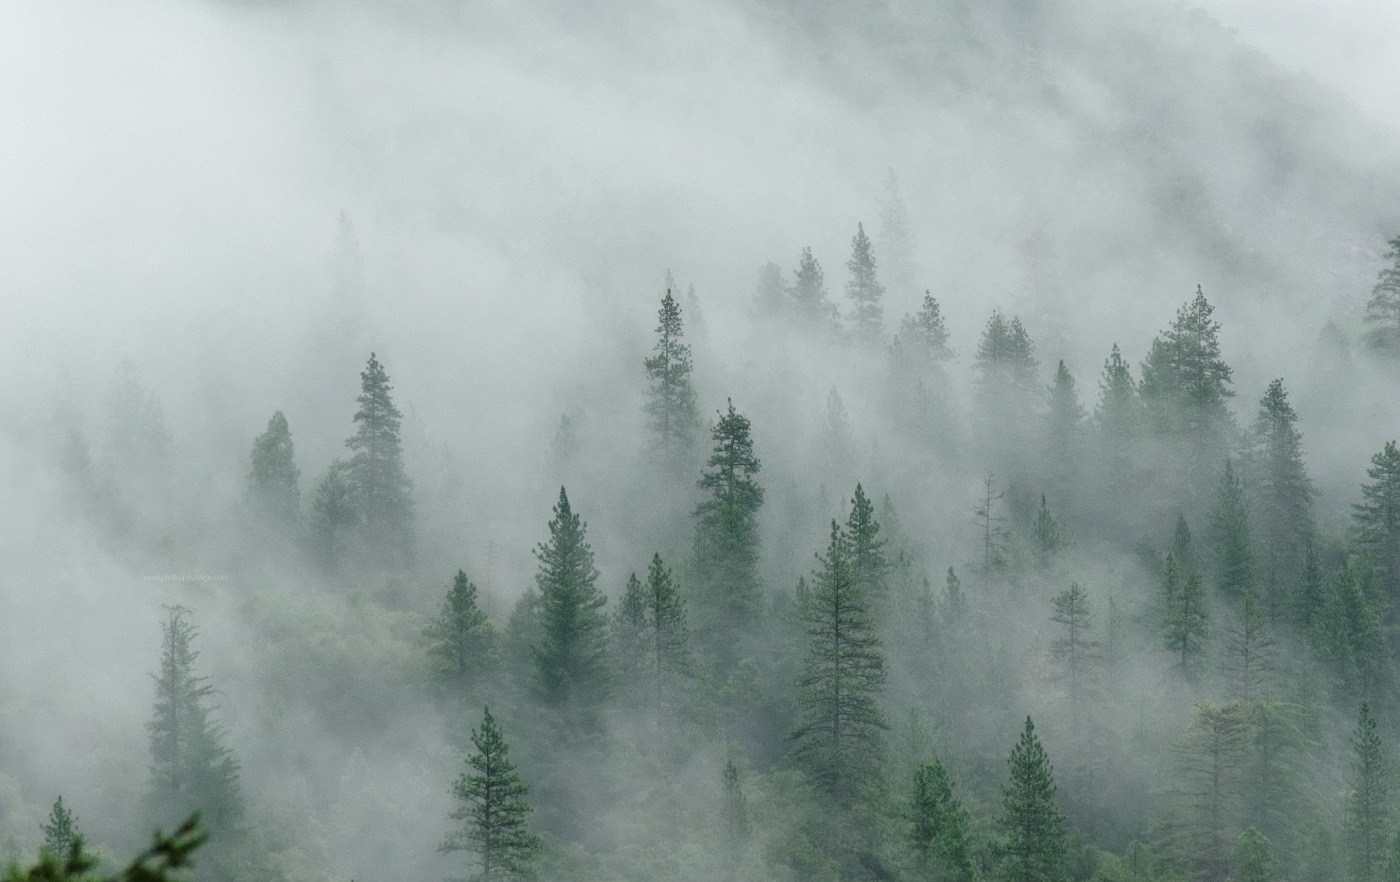

In [19]:
display(Image("img/fog.jpg"))

FANCY COMPUTER MATH GOES HERE

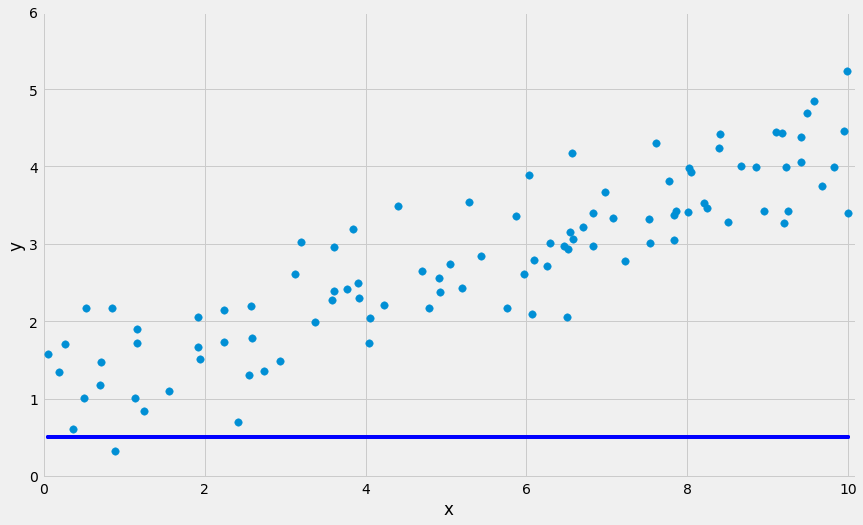

In [20]:
boring_line = Line('blue', 0.5, 0)
plot_points(lines=[boring_line])

In [21]:
def show_cost(Line):
    if not Line.cost:
        Line.cost = score(Line)
    print("cost:", round(Line.cost,2), "\n")

In [37]:
def gradient_descent(starting_line, learning_rate, epochs, 
                     new_color='cyan', 
                     sleep=None, 
                     verbose=False):
    
    yi = starting_line.y_intercept
    s = starting_line.slope
    n = int(len(x))
    all_lines = []
    
    if not starting_line.cost:
        starting_line.cost = score(starting_line)
    all_lines.append(starting_line)
    
    if verbose:
        echo_every_x_iters = int(epochs/10)
    
    for i in range(epochs): 
        y_pred = s*x + yi  # Output of this line's function for this x value
        D_s = (-2/n) * sum(x * (y - y_pred))
        D_yi = (-2/n) * sum(y - y_pred) 
        s = s - learning_rate * D_s  # Update slope
        yi = yi - learning_rate * D_yi  # Update y-intercept
        
        iter_line = Line(color=starting_line.color, y_intercept=yi, slope=s)
        iter_line.cost = score(iter_line)
        all_lines.append(iter_line)
        
        if verbose:
            if (i+1) % echo_every_x_iters == 0:

                print("after", i+1, "epochs:", round(iter_line.cost,3))
                if sleep:
                    time.sleep(sleep)
    
    final_line = Line(color=new_color, y_intercept=yi, slope=s)

    return final_line, all_lines

MACHINES, I HEREBY ORDER YOU TO LEARN:

In [38]:
learning_rate = 0.0003  # Learning rate
epochs = 20  # The number of iterations of gradient descent to do

print("\nStarting values for this line:")
show_cost(boring_line)

trained_20, training_trend_20 = gradient_descent(boring_line, 
                           learning_rate=learning_rate,
                           epochs=epochs, 
                           new_color='cyan',
                           sleep=0.35,
                           verbose=True)

print("\nFinal values for this line:")
show_cost(trained_20)


Starting values for this line:
cost: 3.19 

after 2 epochs: 2.919
after 4 epochs: 2.672
after 6 epochs: 2.447
after 8 epochs: 2.243
after 10 epochs: 2.056
after 12 epochs: 1.887
after 14 epochs: 1.732
after 16 epochs: 1.591
after 18 epochs: 1.463
after 20 epochs: 1.347

Final values for this line:
cost: 1.35 



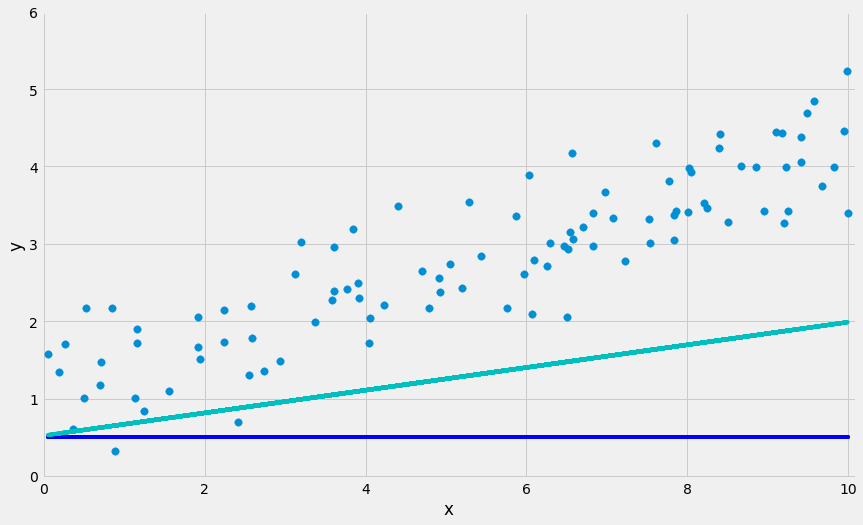

In [39]:
plot_points(lines=[boring_line, trained_20])

TIME FOR MORE LEARNING

In [40]:
epochs = 100
trained_100, training_trend_100 = gradient_descent(boring_line,
                               learning_rate=learning_rate,
                               epochs=epochs,
                               new_color='green',
                               verbose=True)

after 10 epochs: 1.539
after 20 epochs: 0.787
after 30 epochs: 0.444
after 40 epochs: 0.288
after 50 epochs: 0.217
after 60 epochs: 0.185
after 70 epochs: 0.17
after 80 epochs: 0.163
after 90 epochs: 0.16
after 100 epochs: 0.158


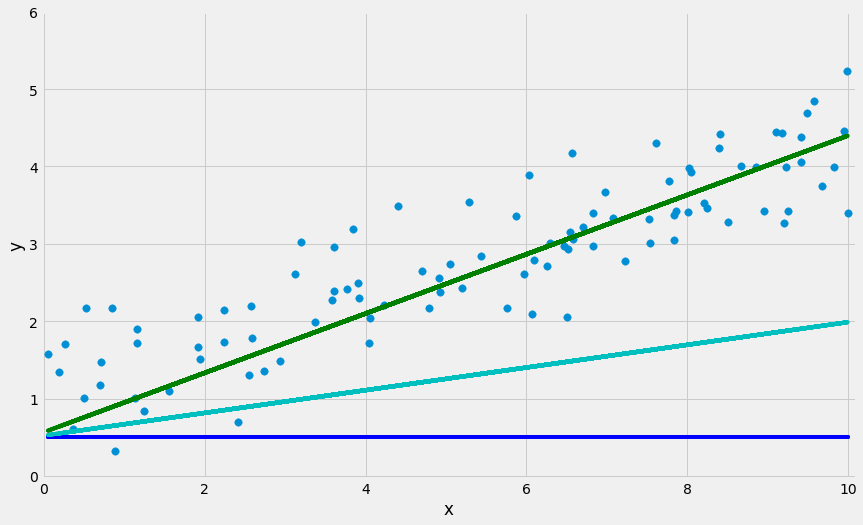

In [41]:
plot_points(lines=[boring_line, trained_20, trained_100])

We can even look at how the cost changes during training:

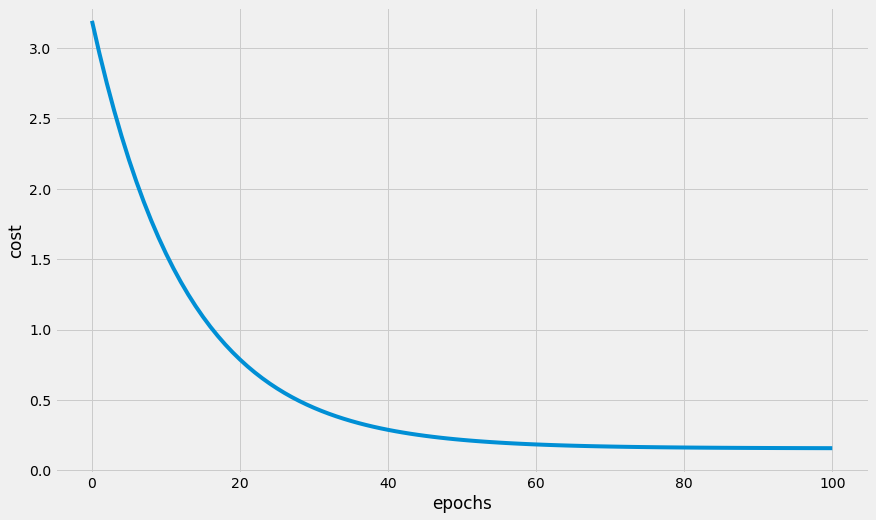

In [42]:
def plot_trend(training_trend):
    cost_values = [i.cost for i in training_trend]
    plt.figure(figsize=FIGSIZE)
    plt.xlabel('epochs')
    plt.ylabel('cost')
    plt.plot(cost_values)
    plt.axis((None, None, -0.02, max(cost_values) + 0.1)) #xmin, xmax, ymin, ymax
    plt.show()
    
plot_trend(training_trend_100)

We can watch how the line moves to fit better over the course of training too:

In [48]:
# Import 
Video("train100.mp4")

WHAT IF WE WENT TOTALLY CRAZY WITH LEARNING, JUST SO MUCH LEARNING THERE SHOULD BE A LAW AGAINST IT?

In [131]:
epochs = 1000
trained_1000, training_trend_1000 = gradient_descent(boring_line,
                               learning_rate=learning_rate,
                               epochs=epochs,
                               new_color='orange')

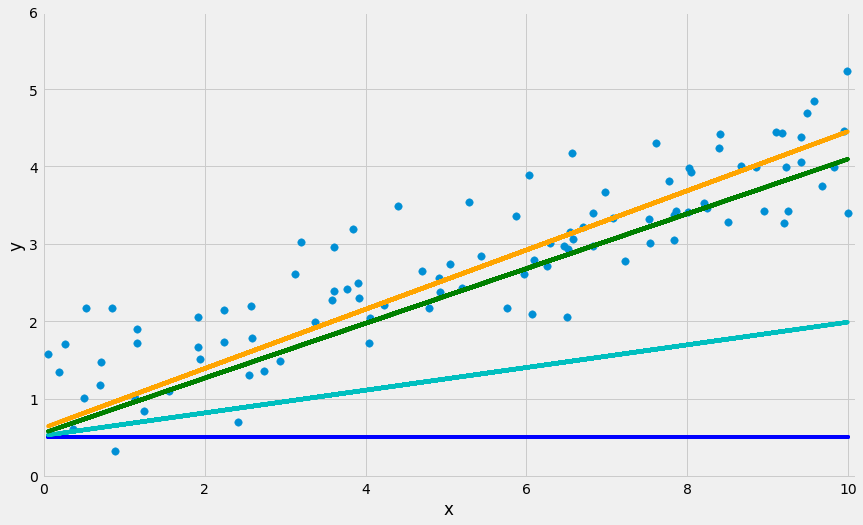

In [132]:
plot_points(lines=[boring_line, trained_20, trained_100, trained_1000])

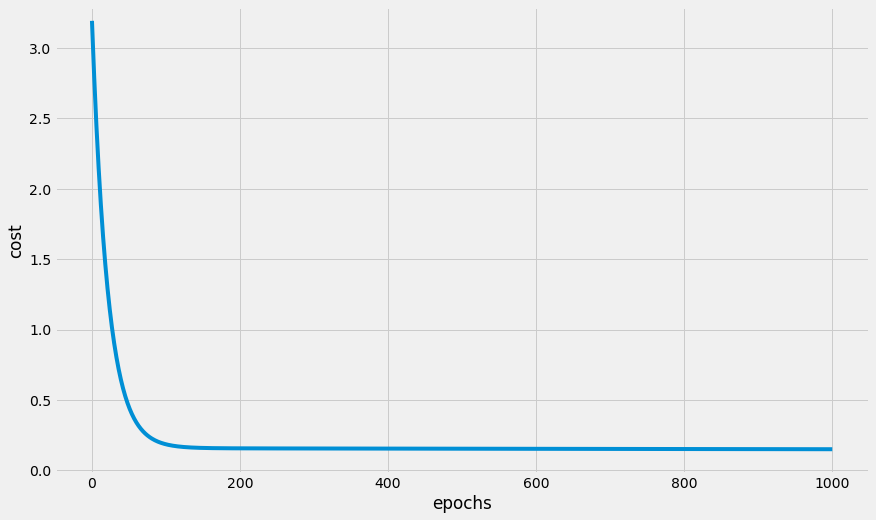

In [147]:
plot_trend(training_trend_1000[0:])

In [45]:
# appendix


# Export to png for animation.
# Watch out, generates lots of files.
def export_pngs(trend):
    for n, i in enumerate(trend):
        savefile = "train_{:04}.png".format(n)
        if n % 5 == 0:
            print(savefile)
        plot_points(lines=[i], savefile=savefile)
        
# export_pngs(training_trend_100)

## Then stitch to video with ffmpeg 
## ffmpeg -framerate 16 -i train100_%04d.png train100.mp4

